#Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading Model

In [4]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/trained_model.h5')

##Testing Model

In [5]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetables_Detection_project/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode ='rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 359 files belonging to 36 classes.


#Visualization and Performing Prediction on Single Image

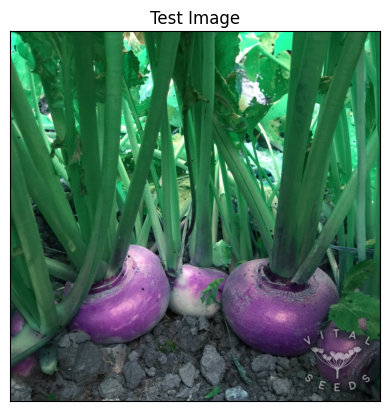

In [22]:
import cv2
image_path = '/content/drive/MyDrive/Fruits_Vegetables_Detection_project/test/turnip/Image_2.jpg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [24]:
print(predictions)
print(max(predictions[0]))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1.0


In [25]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [26]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])

34


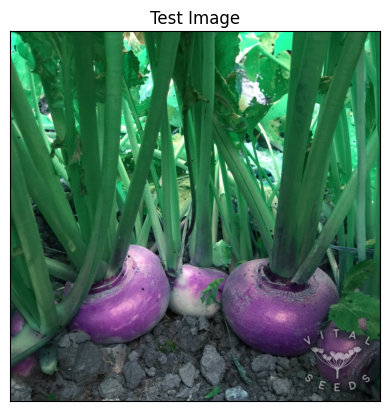

In [27]:
#Display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
#single Prediction
print("It is a {}".format(test_set.class_names[result_index[0][0]]))

It is a turnip
